In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

### Ejercicio 1 
Considere el siguiente generador linear congruente

𝑈𝑛+1 = (a𝑈𝑛 + c) 𝑚𝑜𝑑 m,

donde 𝑎 = 1, 𝑐 = 7 y 𝑚 = 10.

- a Genere la secuencia {𝑈1, 𝑈2, ... , 𝑈11} a partir de 𝑈0 = 7.
- b Genere la secuencia {𝑈1, 𝑈2, ... , 𝑈11} a partir de 𝑈0 = 1.
- c Explique por qué este algoritmo no es válido y proponga un cambio para mejorarlo justificando adecuadamente.


In [28]:
# Generador linear congruente
a = 1
c = 7
m = 10
Un = {}
Un[0] = 7

def U(n, a, c, m):
    if (n in Un) :
        return Un[n]
    else:
        Un[n] = (a*U(n-1, a, c, m) + c) % m
        return Un[n]

for i in range(1,12):
    print(U(i, a, c, m))

4
1
8
5
2
9
6
3
0
7
4


In [29]:
Un = {}
Un[0] = 1
for i in range(1,12):
    print(U(i, a, c, m))

8
5
2
9
6
3
0
7
4
1
8


Teoría:

#### Propiedades de los buenos generadores

- 1 Los números deben tener una distribución correcta, por ej: uniforme y no deben estar correlacionados
- 2 La secuencia debe tener un período suficientemente largo
- 3 La secuencia se tiene que poder reproducir (replicar experimentos)

Puntualmente para el método lineal congruente podemos asegurar que el período sea el máximo posible m (m porque es el numero que genera el resto, más numeros diferentes que m no se puede tener) si se cumple el Teorema A [Grinberger, 1961; Hull&Dobel, 1962]:
El algoritmo Lineal Congruente tiene período m si y sólo sí:
- i) c es relativo primo con m (no existe número k ≠ 1 que divida a ambos)
- ii) b = a - 1 es un múltiplo de p, para cada primo p dividiendo a m.
- iii) b es un múltiplo de 4, si m es un múltiplo de 4

### Ejercicio 2
El generador de números aleatorios de Excel (Microsoft) es el siguiente:

𝑈𝑛+1 = (9821𝑈𝑛 + 0.211327) 𝑚𝑜𝑑 1,

donde los cálculos se realizan con aritmética de punto flotante. Además, Excel genera el valor inicial 𝑈0 utilizando el reloj interno. Describa al menos, una de las mayores deficiencias de este
método.

????????

In [30]:
a = 9821
c = 0.211327
m = 1
Un = {}
Un[0] = np.random.uniform()

for i in range(0,10):
    print(U(i, a, c, m))

0.6516012408427048
0.5871133162036131
0.2512054356839144
0.2999108517233253
0.6358017747779741
0.42055709448322887
0.502551919790676
0.7737312642293546
0.026072996491166123
0.2742255397424742


La mayor deficiencia es que es irreproducible (supongo)

### Ejercicio 3

Dado 𝑥0 = 5 y el generador

𝑋𝑛+1 = (3𝑋𝑛) 𝑚𝑜𝑑 150,

Encontrar la secuencia 𝑥1, 𝑥2, ... , 𝑥10.

In [31]:
Un = {}
Un[0] = 5
a = 3
c = 0
m = 150


for i in range(1,10):
    print(U(i, a, c, m))

15
45
135
105
15
45
135
105
15


### Ejercicio 4

Dado  𝑥1=6,  𝑥2=4 y el generador

𝑋𝑛+1 = (3𝑋𝑛 + 𝑐) 𝑚𝑜𝑑 7,

determinar 𝑥51.

---




In [50]:
Un = {}
Un[0] = 2
a = 3
c = 7  
m = 7


for i in range(0,10):
    print(U(i, a, c, m))
    
U(51, a, c, m)

2
6
4
5
1
3
2
6
4
5


5

### Ejercicio 5

Determine 𝑥100 para un generador congruente multiplicativo con módulo 7, multiplicador 4, y condición inicial 𝑥0 = 1.

¿Cuál es la longitud de ciclo máxima posible para un generador congruente multiplicativo con módulo 7? 

Dado el siguiente generador congruente multiplicativo:

𝑋𝑛+1 = (7𝑋𝑛) 𝑚𝑜𝑑 13,

para 𝑛 = 1,2, ... , con condición inicial 𝑥0 = 1 . ¿Cuáles de las siguientes afirmaciones esverdadera? 

I. La longitud de ciclo máxima posible es 12.

II. Este generador es mas veloz que un generador congruente lineal con incremento no-nulo,
usando el mismo módulo, multiplicador y condición inicial.

III. 𝑥4 = 9.


In [51]:
Un = {}
Un[0] = 1
a = 4
c =  0 
m = 7


for i in range(0,10):
    print(U(i, a, c, m))
    
U(100, a, c, m)

1
4
2
1
4
2
1
4
2
1


4

In [52]:
Un = {}
Un[0] = 1
a = 7
c =  0 
m = 13


for i in range(0,10):
    print(U(i, a, c, m))
    
U(4, a, c, m)

1
7
10
5
9
11
12
6
3
8


9

----

la longitud de ciclo máxima posible para un generador congruente multiplicativo con módulo 7 es 7


I. FALSA, ES 13

II. ?

III. VERDADERA


### Ejercicio 6

El generador de números aleatorios de Visual BASIC (Microsoft) está definido por

𝑋𝑛+1 = (1,140,671 ∙ 𝑋𝑛 + 1,280,163) 𝑚𝑜𝑑 224.

Si comenzamos la secuencia con un 1, ¿cuáles son los siguientes tres valores en la secuencia?

Dado un generador lineal congruente con módulo 9, multiplicador 7 e incremento 4. Si 𝑥i+1 = 3, ¿cuál es el valor de 𝑥i?

In [53]:
Un = {}
Un[0] = 1
a = 1140671
c =  1280163
m = 224


for i in range(0,4):
    print(U(i, a, c, m))
    

1
66
129
66


In [61]:
Un = {}
Un[0] = 3
a = 7
c = 4
m = 9


for i in range(0,14):
    print(U(i, a, c, m))
    

3
7
8
6
1
2
0
4
5
3
7
8
6
1


Vemos, cuando se repite la secuencia, que el numero anterior a Xi+1 = 3, es decir Xi es 5

### Ejercicio 7

Se desea utilizar una urna para simular una variable aleatoria con un espacio muestral 𝑆 = {1,2,3,4,5} y probabilidades 𝑝1 =1/3, 𝑝2 =1/5, 𝑝3 =1/4, 𝑝4 =1/7, 𝑝5 =1−(𝑝1 +𝑝2 +𝑝3 +𝑝4). ¿Cuántas bolas debería contener la urna y cómo deberían estar marcadas? Generalice este resultado para demostrar que una urna puede ser utilizada para simular cualquier experimento aleatorio con un espacio muestral finito y probabilidades dadas por números racionales.

---

𝑝5 = 1−(𝑝1 +𝑝2 +𝑝3 +𝑝4) = 31/420


Podria tener 420 bolas de las cuales:

140 con el número 1, ya que 𝑝1 = 1/3 = 140/420

84 con el número 2, 𝑝2 = 1/5 = 84/420

105 con el número 3, 𝑝3 = 1/4 = 105/420

60 con el número 4, 𝑝4 = 1/7 = 60/420

y 31 con el número 5


### Ejercicio 8

Supongamos que estamos interesados en utilizar una moneda para simular un experimento aleatorio en el cual hay seis posibles estados equiprobables, donde 𝑆 = {0,1,2,3,4,5}. Se propone el siguiente método que es una versión del método del rechazo:
1. Tirar una moneda 3 veces y obtener un número binario de tres dígitos identificando los 1’s con caras y los 0’s con secas.
2. Si el resultado del punto 1 es un número que está en 𝑆, se anota el resultado, sino se vuelve al punto 1.

Encuentre la probabilidad de que un número válido sea obtenido en el punto 2. 

Demuestre que los números producidos en el punto 2. son equiprobables.

Generalice este algoritmo para demostrar que una moneda puede ser usado para simular cualquier experimento aleatorio con urnas.

---

Cada lanzamiento de una moneda es independiente de los otros. Por lo tanto:

POSIBLES RESULTADOS

000 = 0

001 = 1

010 = 2

011 = 3

100 = 4

101 = 5

110 = 6

111 = 7


P(SECA, SECA, SECA) = (1/2)ˆ3

P(SECA, SECA, CARA) = (1/2)ˆ3

...

P(CARA, CARA, CARA) = (1/2)ˆ3

Esto demuestra que los números obtenidos en el punto 1 son equiprobables.

La probabilidad de que se encuentre un número válido es 6/8, de los 8 casos equiprobables solo 2 son inválidos.

 
La generalizacion creo que apunta a que puedo simular cualquier experimento de X urnas con una moneda, solo que la cantidad de lanzamientos dependerá de X.

X <= 2^(cantidad de lanzamientos)


### Ejercicio 9

Utilice la función rand() de Octave/Matlab o su equivalente en Python para generar 1000 pares de números en [0,1]. Grafique un scatter-plot para confirmar que los puntos obtenidos están uniformemente distribuidos sobre un cuadrado de lado unitario.

In [87]:
randomNumsX = list()
randomNumsY = list()
for i in range(0, 1000):
    randomNumsX.append(np.random.uniform())
    randomNumsY.append(np.random.uniform())    

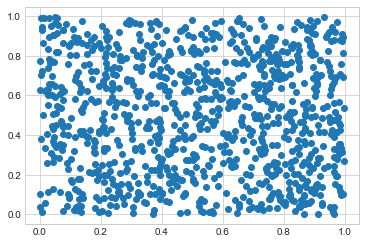

In [89]:
plt.plot(randomNumsX, randomNumsY, 'o');

### Ejercicio 10

Proponga un algoritmo e impleméntelo en Octave/Matlab o Python que genere una variable aleatoria con la siguiente función de densidad:

𝑓x (𝑥)=30(𝑥ˆ2 −2𝑥ˆ3 +𝑥ˆ4)   con   0<𝑥<1.

Verifique que es una función de densidad de probabilidad válida.